In [1]:
# ref:
# map
# http://www.onegreen.net/maps/HTML/48077.html
    
    

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [3]:
import geopandas as gpd
# import contextily as ctx

In [4]:
RANDOM_STATE = 123

In [5]:
# import googletrans
# from googletrans import Translator



## previously in EDA
merge device and event

Here we can focus on the event number recorded, Which can indicate how often/frequently the users use their phones. (assuming the sample rate is not significantly different from each other. Though it is not totally true, since we have observe many 1-event record users, thus there might be something happened.)

In [6]:
df_merge_phone_events_focus = pd.read_csv('./talkingdata-mobile-user-demographics/merge_phone_events_focus.csv')
df_merge_phone_events_focus.head()

device_id brand_parse  model_parse gender  age   group  \
0 -5827952925479472594      Xiaomi  MI One Plus      M   30  M29-31   
1 -5827952925479472594      Xiaomi  MI One Plus      M   30  M29-31   
2 -5827952925479472594      Xiaomi  MI One Plus      M   30  M29-31   
3 -5827952925479472594      Xiaomi  MI One Plus      M   30  M29-31   
4 -5827952925479472594      Xiaomi  MI One Plus      M   30  M29-31   

   brand_model brand_cuttail brand_cuttail_10 brand_cuttail_5 age_cate  \
0  other_model        Xiaomi           Xiaomi          Xiaomi   A29-31   
1  other_model        Xiaomi           Xiaomi          Xiaomi   A29-31   
2  other_model        Xiaomi           Xiaomi          Xiaomi   A29-31   
3  other_model        Xiaomi           Xiaomi          Xiaomi   A29-31   
4  other_model        Xiaomi           Xiaomi          Xiaomi   A29-31   

   event_id            timestamp  longitude  latitude  
0     69136  2016-05-02 06:24:55        0.0       0.0  
1    174606  2016-05-01 00:31:24        0.0       0.0  
2    243296  2016-05-02 06:21:29        0.0       0.0  
3    784955  2016-05-05 06:37:57        0.0       0.0  
4   1001397  2016-05-01 00:34:21        0.0       0.0

In [7]:
df_merge_phone_events_focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220474 entries, 0 to 1220473
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   device_id         1220474 non-null  int64  
 1   brand_parse       1220474 non-null  object 
 2   model_parse       1220474 non-null  object 
 3   gender            1220474 non-null  object 
 4   age               1220474 non-null  int64  
 5   group             1220474 non-null  object 
 6   brand_model       1220474 non-null  object 
 7   brand_cuttail     1220474 non-null  object 
 8   brand_cuttail_10  1220474 non-null  object 
 9   brand_cuttail_5   1220474 non-null  object 
 10  age_cate          1220474 non-null  object 
 11  event_id          1220474 non-null  int64  
 12  timestamp         1220474 non-null  object 
 13  longitude         1220474 non-null  float64
 14  latitude          1220474 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage:

In [8]:
df_merge_phone_events_focus_mainland_original = pd.read_csv('./talkingdata-mobile-user-demographics/merge_phone_events_focus_mainland.csv')
# df_merge_phone_events_focus_mainland_original.device_id = df_merge_phone_events_focus_mainland_original.device_id.astype('str')

df_merge_phone_events_focus_mainland_original.head()


device_id brand_parse model_parse gender  age   group  \
0 -3178958522047733033        vivo       X5Pro      M   30  M29-31   
1 -3178958522047733033        vivo       X5Pro      M   30  M29-31   
2 -3178958522047733033        vivo       X5Pro      M   30  M29-31   
3 -3178958522047733033        vivo       X5Pro      M   30  M29-31   
4 -3178958522047733033        vivo       X5Pro      M   30  M29-31   

  brand_model brand_cuttail brand_cuttail_10 brand_cuttail_5 age_cate  \
0  vivo-X5Pro          vivo             vivo           other   A29-31   
1  vivo-X5Pro          vivo             vivo           other   A29-31   
2  vivo-X5Pro          vivo             vivo           other   A29-31   
3  vivo-X5Pro          vivo             vivo           other   A29-31   
4  vivo-X5Pro          vivo             vivo           other   A29-31   

   event_id            timestamp  longitude  latitude  
0    109189  2016-05-01 18:41:24     119.46     32.64  
1    154413  2016-05-01 16:20:50     119.41     32.41  
2    169986  2016-05-03 23:09:15     119.41     32.39  
3    210771  2016-05-02 21:41:50     119.43     32.78  
4    236106  2016-05-02 21:40:13     119.43     32.78

In [9]:
df_merge_phone_events_focus_mainland_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832834 entries, 0 to 832833
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   device_id         832834 non-null  int64  
 1   brand_parse       832834 non-null  object 
 2   model_parse       832834 non-null  object 
 3   gender            832834 non-null  object 
 4   age               832834 non-null  int64  
 5   group             832834 non-null  object 
 6   brand_model       832834 non-null  object 
 7   brand_cuttail     832834 non-null  object 
 8   brand_cuttail_10  832834 non-null  object 
 9   brand_cuttail_5   832834 non-null  object 
 10  age_cate          832834 non-null  object 
 11  event_id          832834 non-null  int64  
 12  timestamp         832834 non-null  object 
 13  longitude         832834 non-null  float64
 14  latitude          832834 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 95.3+ MB


In [10]:
df_merge_phone_focus_cuttail_newgrp = pd.read_csv('./talkingdata-mobile-user-demographics/merge_phone_focus_cuttail_newgrp.csv')
# df_merge_phone_events_focus_mainland_original.device_id = df_merge_phone_events_focus_mainland_original.device_id.astype('str')

df_merge_phone_focus_cuttail_newgrp.head()


device_id brand_parse  model_parse gender  age   group  \
0 -5827952925479472594      Xiaomi  MI One Plus      M   30  M29-31   
1  9127764357931097305        vivo        X5Pro      M   30  M29-31   
2  1938498014635642053        vivo        X5Pro      M   31  M29-31   
3 -3178958522047733033        vivo        X5Pro      M   30  M29-31   
4  -661674373703931011        vivo        X5Pro      M   30  M29-31   

   brand_model brand_cuttail brand_cuttail_10 brand_cuttail_5 age_cate  
0  other_model        Xiaomi           Xiaomi          Xiaomi   A29-31  
1   vivo-X5Pro          vivo             vivo           other   A29-31  
2   vivo-X5Pro          vivo             vivo           other   A29-31  
3   vivo-X5Pro          vivo             vivo           other   A29-31  
4   vivo-X5Pro          vivo             vivo           other   A29-31

In [11]:
df_merge_phone_focus_cuttail_newgrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23400 entries, 0 to 23399
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   device_id         23400 non-null  int64 
 1   brand_parse       23400 non-null  object
 2   model_parse       23400 non-null  object
 3   gender            23400 non-null  object
 4   age               23400 non-null  int64 
 5   group             23400 non-null  object
 6   brand_model       23400 non-null  object
 7   brand_cuttail     23400 non-null  object
 8   brand_cuttail_10  23400 non-null  object
 9   brand_cuttail_5   23400 non-null  object
 10  age_cate          23400 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


In [12]:
# some errands
# df_merge_phone_events_focus = pd.read_csv('./talkingdata-mobile-user-demographics/merge_phone_events_focus.csv')
# df_age_cate_link = pd.DataFrame({'group':np.sort(df_gender_age_train.group.unique())})
# df_age_cate_link['age_cate'] = ['A22-', 'A23-26', 'A27-28', 'A29-31', 'A32-40', 'A40+'] * 2
df_age_cate_link = pd.DataFrame({'age_cate':['A22-', 'A23-26', 'A27-28', 'A29-31', 'A32-40', 'A40+']})

order_tmp = df_merge_phone_events_focus_mainland_original.groupby('brand_cuttail').device_id.agg('count').sort_values(ascending=False).index

In [13]:
## the dataset is kinda too large, I down-sample here just to build the pipeline

In [14]:

df_merge_phone_events_focus_mainland_sampled = df_merge_phone_events_focus_mainland_original.sample(n=50000, random_state=RANDOM_STATE)

df_merge_phone_events_focus_mainland = df_merge_phone_events_focus_mainland_original.copy()
# df_merge_phone_events_focus_mainland = df_merge_phone_events_focus_mainland_sampled.copy()

In [15]:
%%time
df_merge_phone_events_focus_mainland.device_id.value_counts()


Wall time: 52.9 ms


-6242501228649113250    4110
-8340098378141155823    3946
-3746248670824158209    3760
 5375599021847302819    3128
-2241630667689903982    3030
                        ... 
 4497175845951589758       1
-1524620065043482090       1
 5843623613840693191       1
-1499197145817039032       1
 7471360393890629846       1
Name: device_id, Length: 11558, dtype: int64

In [16]:
import plotly.express as px

In [17]:
fig = px.line(y=df_merge_phone_events_focus_mainland.device_id.value_counts(),
             x=[str(name)+' ({})'.format(i)  for i, name in (enumerate(df_merge_phone_events_focus_mainland.device_id.value_counts().index, start=1))],
         )
fig.update_layout(xaxis_type='category',
#                   title_text='Bar chart with categorical axes'
                 )
fig.show()

In [18]:
# fig = px.line(y=df_merge_phone_events_focus_mainland.device_id.value_counts(),
#              x=df_merge_phone_events_focus_mainland.device_id.value_counts().index,
#          )
# fig.update_layout(xaxis_type='category',
# #                   title_text='Bar chart with categorical axes'
#                  )
# fig.show()

# # this one shows how many events were recorded (actually only 2k are highly active)
# fig = px.line(y=df_merge_phone_events_focus_mainland.device_id.value_counts(),
#              x=range(len(df_merge_phone_events_focus_mainland.device_id.value_counts())))
# fig.show()

### analysis event counts across target labels

In [19]:
df_event_count = df_merge_phone_events_focus_mainland.device_id.value_counts().reset_index()
df_event_count.rename(columns={'index': "device_id", 'device_id': "event_count"}, inplace=True)
df_event_count

device_id  event_count
0     -6242501228649113250         4110
1     -8340098378141155823         3946
2     -3746248670824158209         3760
3      5375599021847302819         3128
4     -2241630667689903982         3030
...                    ...          ...
11553  4497175845951589758            1
11554 -1524620065043482090            1
11555  5843623613840693191            1
11556 -1499197145817039032            1
11557  7471360393890629846            1

[11558 rows x 2 columns]

In [20]:
df_merge_device_event_addcount = pd.merge(left=df_merge_phone_focus_cuttail_newgrp,
                                         right=df_event_count,
                                         how='inner',
                                         on='device_id')
df_merge_device_event_addcount.head()

device_id brand_parse model_parse gender  age   group  \
0 -3178958522047733033        vivo       X5Pro      M   30  M29-31   
1  -661674373703931011        vivo       X5Pro      M   30  M29-31   
2 -4159560526723406355        vivo       X5Pro      M   29  M29-31   
3 -8898050314299440536        vivo       X5Pro      M   30  M29-31   
4 -6820699675296211710        vivo       X5Pro      M   29  M29-31   

  brand_model brand_cuttail brand_cuttail_10 brand_cuttail_5 age_cate  \
0  vivo-X5Pro          vivo             vivo           other   A29-31   
1  vivo-X5Pro          vivo             vivo           other   A29-31   
2  vivo-X5Pro          vivo             vivo           other   A29-31   
3  vivo-X5Pro          vivo             vivo           other   A29-31   
4  vivo-X5Pro          vivo             vivo           other   A29-31   

   event_count  
0          140  
1           66  
2            7  
3            8  
4           96

In [21]:
df_merge_device_event_addcount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11608 entries, 0 to 11607
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   device_id         11608 non-null  int64 
 1   brand_parse       11608 non-null  object
 2   model_parse       11608 non-null  object
 3   gender            11608 non-null  object
 4   age               11608 non-null  int64 
 5   group             11608 non-null  object
 6   brand_model       11608 non-null  object
 7   brand_cuttail     11608 non-null  object
 8   brand_cuttail_10  11608 non-null  object
 9   brand_cuttail_5   11608 non-null  object
 10  age_cate          11608 non-null  object
 11  event_count       11608 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.2+ MB


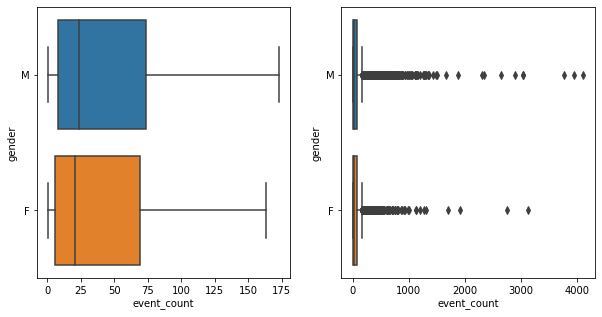

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='gender',
            showfliers=False,
        
             ax=ax[0]
             )

sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='gender',
            showfliers=True,
        
             ax=ax[1]
             )

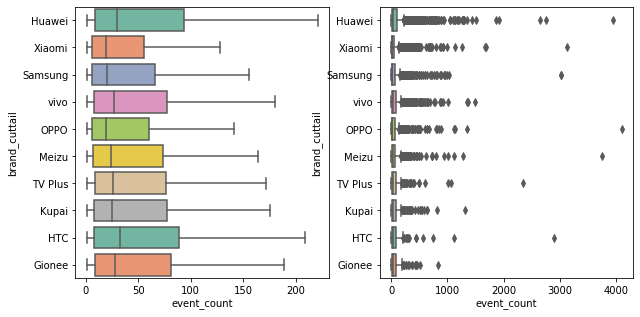

In [23]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='brand_cuttail',
            showfliers=False,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='brand_cuttail',
            showfliers=True,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[1]
             )

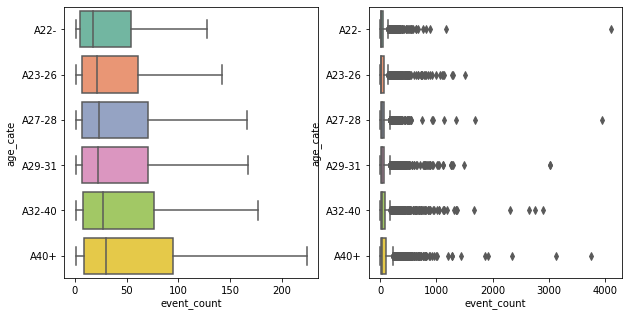

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='age_cate',
            showfliers=False,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='age_cate',
            showfliers=True,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[1]
             )

# some comment
#### I have to point out that the event count comment here is not the same as the record count in the former analysis, and is more useful.
Here the event count has its distribution and can be considered as a feauture (i.e. each deviced_id has an associated event_count), while the record count is just a number, i.e. discriptive statistics.

#### as mentioned earlier, if we consider event count as indicator how frequent users on their phones, then 
- the distributions across all three topics (i.e. gender, brand, age-categories) are heavy-tailed.
- male and female users have similar phone-using behavior
- Huawei and Lenovo users tend to use phone more often
- users in higher age group tend to use phone more often.

#### a reminder, if we want to include this feature for later ML model, it might be desired to tranform the data (i.e. quantile-transform, power-transform) to make the distribution more normal-like.

## about geo data
I like geo data. it is kinda hard to handel them, but it often show vivid visualization.
- first sight about geo-data is that there exist a lot of 0. I don't think those make sense. Such 0 GPS data is normally hard to fill-na. (I will take a deeper look into it and confirm that's the case. i.e. check if the deviced_id assocaited to the zero-GPS ever had GPS record). 
- Note that, zero-GPS data also contributed a large proportion of the data (i.e. 30%). We probabely need to consider adaptive model to handel the target. i.e. one model use GPS data with less rows, another one without GPS data but with full rows (since GPS data is not easy to use anyways).
- Last but not least, the zero-GPS records might still have prediction power, i.e. for some reason users from certain group are likely to disable GPS function, thus no GPS data for them. This is similar to the outliers data, it is possible that those customers were traveling abroad or it could be errors.
- For now, let's first have some analysis on mainland china. (roughly long:[70,150],lat:[10,50]


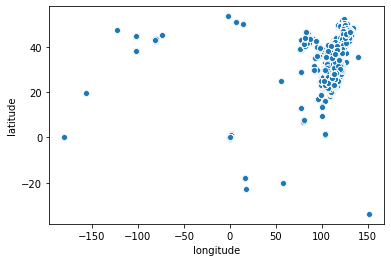

In [25]:
sns.scatterplot(df_merge_phone_events_focus.longitude,
               df_merge_phone_events_focus.latitude,
               )

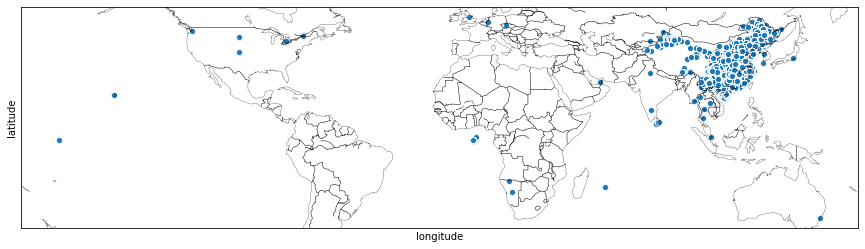

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15,15), 
#                          gridspec_kw={'width_ratios': [3, 1]}
                        )

sns.scatterplot(df_merge_phone_events_focus.longitude,
               df_merge_phone_events_focus.latitude,
               ax=ax)
# ax.get_xlim()
# ax.get_ylim()
# Initialize the map
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )
 
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, ax=ax)

In [27]:
df_merge_phone_events_focus[(df_merge_phone_events_focus.longitude<20) &
                            (df_merge_phone_events_focus.longitude>-20)].count()

device_id           387115
brand_parse         387115
model_parse         387115
gender              387115
age                 387115
group               387115
brand_model         387115
brand_cuttail       387115
brand_cuttail_10    387115
brand_cuttail_5     387115
age_cate            387115
event_id            387115
timestamp           387115
longitude           387115
latitude            387115
dtype: int64

In [28]:
# # let's first have some analysis on mainland china. (roughly long:[70,150],lat:[10,50]
# df_merge_phone_events_focus_mainland = df_merge_phone_events_focus[(df_merge_phone_events_focus.longitude>70) &
#                             (df_merge_phone_events_focus.longitude<150)&
#                             (df_merge_phone_events_focus.latitude>10) &
#                             (df_merge_phone_events_focus.latitude<60)]
# df_merge_phone_events_focus_mainland.info()

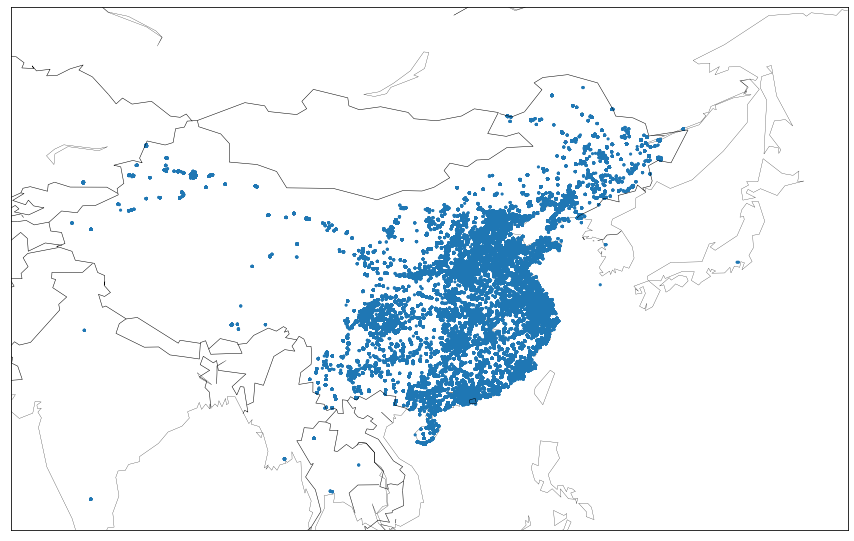

In [29]:
# track where the users are. 
# A: tip, when the records number is this high, we migth want to set alpha to very low values ()
# TIPS: actually, a better option is to decrease the size, so the underneath part can emerge


fig, axes = plt.subplots(1, 1, figsize=(15,15), 
#                          gridspec_kw={'width_ratios': [3, 1]}
                        )

# Initialize the map
map = Basemap(llcrnrlon=70, urcrnrlon=150,llcrnrlat=10, urcrnrlat=60, ) 
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
ax=axes
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)

sns.scatterplot(data=df_merge_phone_events_focus_mainland,
                x='longitude',
                y='latitude',
#                 alpha=0.005,
#                 alpha=4000.0/len(df_merge_phone_events_focus_mainland),
                edgecolor ='none',
                s=10,
                ax=ax)
ax.set_aspect(aspect='equal')


# ax=axes[1]
# map.drawcountries(color="black", linewidth=0.5, ax=ax)
# map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)
# sns.scatterplot(data=df_merge_phone_events_focus_mainland,
#                 x='longitude',
#                 y='latitude',
#                 alpha=1,
#                 ax=ax)

# ax.set_aspect(aspect='equal')

plt.show()

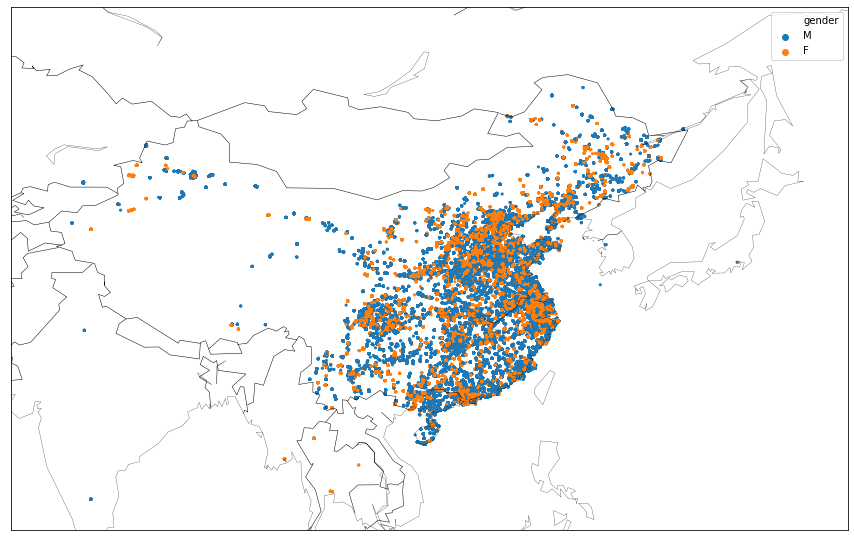

In [30]:
# what about the gender group?
fig, ax = plt.subplots(figsize=(15,15))

# Initialize the map
map = Basemap(llcrnrlon=70, urcrnrlon=150,llcrnrlat=10, urcrnrlat=60, )
 
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, ax=ax)


sns.scatterplot(data=df_merge_phone_events_focus_mainland,
                x='longitude',
                y='latitude',
                hue='gender',
#                 hue_order=np.append(order_tmp[:len(df_merge_phone_events_focus_mainland.brand_cuttail_5.unique())].values, 'other'),
#                 palette='Set2',
                edgecolor ='none',                
#                 alpha=0.005,
                s=10,
                ax=ax)

ax.set_aspect(aspect='equal')

plt.show()

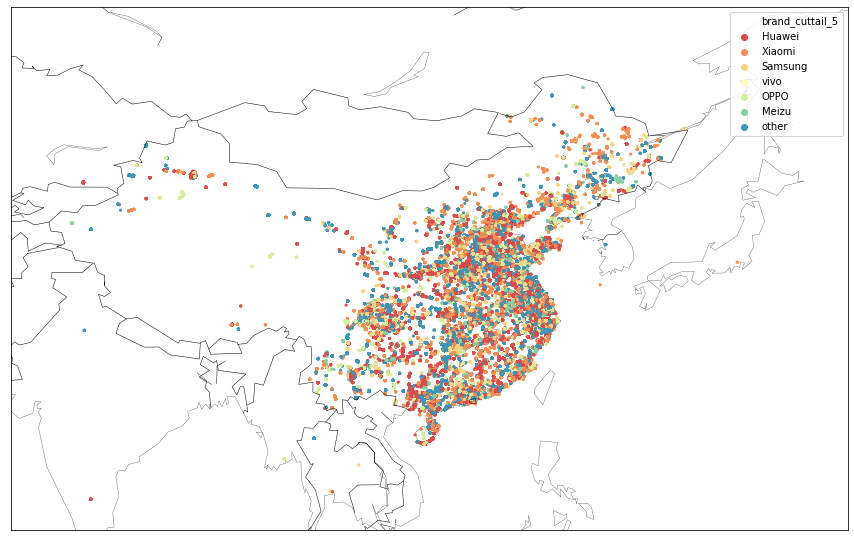

In [31]:
# another intersting to see the activity locations associated with brand (top 5 brand here)
# TIPS: for multiple color plot, don't use alpha, also you might want get rid of the edgecolor
# a little bit overwhelming, but it is what it is.
fig, ax = plt.subplots(figsize=(15,15))

# Initialize the map
map = Basemap(llcrnrlon=70, urcrnrlon=150,llcrnrlat=10, urcrnrlat=60, )
 
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)


sns.scatterplot(data=df_merge_phone_events_focus_mainland,
                x='longitude',
                y='latitude',
                hue='brand_cuttail_5',
                hue_order=np.append(order_tmp[:len(df_merge_phone_events_focus_mainland.brand_cuttail_5.unique())].values, 'other'),
                palette='Spectral',
#                 alpha=0.005,
                s=10,
                edgecolor ='none',
                ax=ax)

ax.set_aspect(aspect='equal')

plt.show()

In [32]:
df_merge_phone_events_focus_mainland

device_id brand_parse model_parse gender  age   group  \
0      -3178958522047733033        vivo       X5Pro      M   30  M29-31   
1      -3178958522047733033        vivo       X5Pro      M   30  M29-31   
2      -3178958522047733033        vivo       X5Pro      M   30  M29-31   
3      -3178958522047733033        vivo       X5Pro      M   30  M29-31   
4      -3178958522047733033        vivo       X5Pro      M   30  M29-31   
...                     ...         ...         ...    ...  ...     ...   
832829  5317843922758056841      Mickey       M6-M7      F   62    F43+   
832830  5317843922758056841      Mickey       M6-M7      F   62    F43+   
832831  5317843922758056841      Mickey       M6-M7      F   62    F43+   
832832  5317843922758056841      Mickey       M6-M7      F   62    F43+   
832833  5317843922758056841      Mickey       M6-M7      F   62    F43+   

        brand_model brand_cuttail brand_cuttail_10 brand_cuttail_5 age_cate  \
0        vivo-X5Pro          vivo             vivo           other   A29-31   
1        vivo-X5Pro          vivo             vivo           other   A29-31   
2        vivo-X5Pro          vivo             vivo           other   A29-31   
3        vivo-X5Pro          vivo             vivo           other   A29-31   
4        vivo-X5Pro          vivo             vivo           other   A29-31   
...             ...           ...              ...             ...      ...   
832829  other_model         other            other           other     A40+   
832830  other_model         other            other           other     A40+   
832831  other_model         other            other           other     A40+   
832832  other_model         other            other           other     A40+   
832833  other_model         other            other           other     A40+   

        event_id            timestamp  longitude  latitude  
0         109189  2016-05-01 18:41:24     119.46     32.64  
1         154413  2016-05-01 16:20:50     119.41     32.41  
2         169986  2016-05-03 23:09:15     119.41     32.39  
3         210771  2016-05-02 21:41:50     119.43     32.78  
4         236106  2016-05-02 21:40:13     119.43     32.78  
...          ...                  ...        ...       ...  
832829   3221404  2016-05-07 01:20:35     114.49     36.80  
832830   3231410  2016-05-07 10:47:08     114.49     36.80  
832831   3232602  2016-05-05 11:26:19     114.49     36.80  
832832   3236237  2016-05-07 13:38:33     114.49     36.80  
832833   3249512  2016-05-07 20:58:10     114.49     36.80  

[832834 rows x 15 columns]

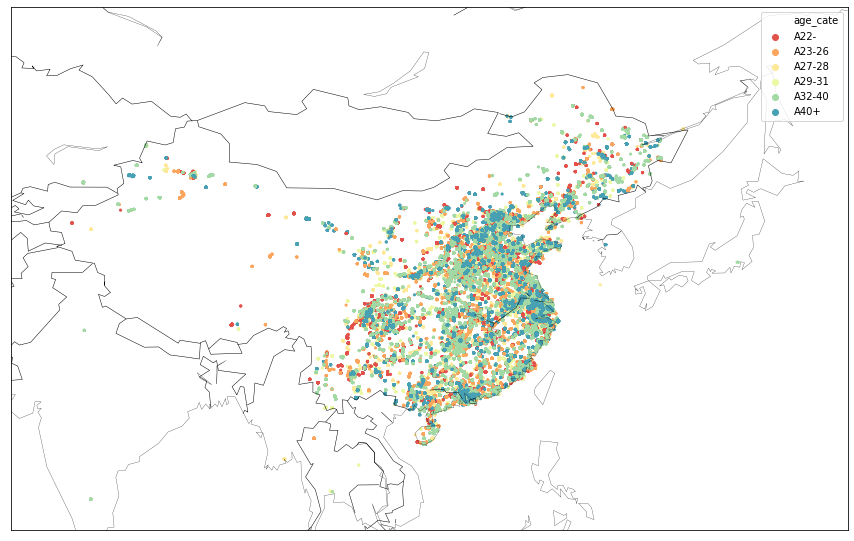

In [33]:
# last but not least age-cate
fig, ax = plt.subplots(figsize=(15,15))

# Initialize the map
map = Basemap(llcrnrlon=70, urcrnrlon=150,llcrnrlat=10, urcrnrlat=60, )
 
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, ax=ax)


sns.scatterplot(data=df_merge_phone_events_focus_mainland,
                x='longitude',
                y='latitude',
                hue='age_cate',
                hue_order=df_age_cate_link.age_cate.unique(),
                palette='Spectral',
                edgecolor ='none',                
#                 alpha=0.005,
                s=10,
                ax=ax)

# ax.set_aspect(aspect='equal')

plt.show()

In [34]:
# # TIPS: when there exist too many scatter overlapping can be a problem. sometimes even of the order of hue order matters.
# # (not sure sns has consider this problem though). here I plot side-by-side two scatter plots using opposite hue order.
# # It turns out the GPS plot does represent the underlying customer activities with their associated age-cate. 
# # (i.e. it is not affected by the hue order. notice the label order is opposite)
# fig, axes = plt.subplots(1,2,figsize=(30,15))

# # Initialize the map
# map = Basemap(llcrnrlon=70, urcrnrlon=150,llcrnrlat=10, urcrnrlat=60, )
 
# # Continent and countries!
# # map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# # map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
# ax=axes[0]
# map.drawcountries(color="black", linewidth=0.5, ax=ax)
# map.drawcoastlines(color="black", linewidth=0.25, ax=ax)


# sns.scatterplot(data=df_merge_phone_events_focus_mainland,
#                 x='longitude',
#                 y='latitude',
#                 hue='age_cate',
#                 hue_order=df_age_cate_link.age_cate.unique(),
#                 palette=sns.color_palette('Set2', 6),
#                 edgecolor ='none',                
# #                 alpha=0.005,
#                 ax=ax)

# ax=axes[1]
# map.drawcountries(color="black", linewidth=0.5, ax=ax)
# map.drawcoastlines(color="black", linewidth=0.25, ax=ax)


# sns.scatterplot(data=df_merge_phone_events_focus_mainland,
#                 x='longitude',
#                 y='latitude',
#                 hue='age_cate',
#                 hue_order=df_age_cate_link.age_cate.unique()[::-1],
#                 palette=sns.color_palette('Set2', 6)[::-1],
#                 edgecolor ='none',                
# #                 alpha=0.005,
#                 ax=ax)

# # ax.set_aspect(aspect='equal')
# plt.tight_layout()

# plt.show()

In [35]:
# df_merge_phone_events_focus_mainland.to_csv('./merge_phone_events_focus_mainland.csv', index=False)

In [36]:
# df_merge_phone_events_focus_mainland = pd.read_csv('./talkingdata-mobile-user-demographics/merge_phone_events_focus_mainland.csv')
# df_merge_phone_events_focus_mainland.head()

In [37]:
# it is cute, but plotly is not efficient to handel 1M+ data
# fig = px.scatter(df_merge_phone_events_focus, x="longitude", y="latitude")
# fig.show()

# let's go personal
but before that, let's take a view of the time stamp

In [38]:
# analysis on time stamp

In [39]:
df_merge_phone_events_focus_mainland['timestamp'] = pd.to_datetime(df_merge_phone_events_focus_mainland.timestamp)

In [40]:
df_merge_phone_events_focus_mainland.loc[:,'device_id'] = df_merge_phone_events_focus_mainland.device_id.astype('str').copy()

In [41]:
df_merge_phone_events_focus_mainland.timestamp

0        2016-05-01 18:41:24
1        2016-05-01 16:20:50
2        2016-05-03 23:09:15
3        2016-05-02 21:41:50
4        2016-05-02 21:40:13
                 ...        
832829   2016-05-07 01:20:35
832830   2016-05-07 10:47:08
832831   2016-05-05 11:26:19
832832   2016-05-07 13:38:33
832833   2016-05-07 20:58:10
Name: timestamp, Length: 832834, dtype: datetime64[ns]

In [42]:
# only 1 week (7 days + barely nothing 2 days), not sure what deos freq represent
df_merge_phone_events_focus_mainland.timestamp.describe()

count                  832834
unique                 430782
top       2016-05-04 10:00:34
freq                       13
first     2016-04-30 23:52:26
last      2016-05-08 00:00:08
Name: timestamp, dtype: object

In [43]:
# 
# use geopandas
# prepare a shapefile as basemap

In [44]:
# zipfile = "./GIS_china/CHN_adm.zip!CHN_adm3.shp"
# states = gpd.read_file(zipfile)

local_path = './GIS_china/'

In [45]:
import glob
filenames_0 = [file.split('\\')[-1] for file in glob.glob(local_path+"*")]
filenames = [file for file in filenames_0 if file.split('.')[-1] in ['dbf', 'prj', 'shp', 'shx']]
# filenames

In [46]:
# dbf, prj, shp, shx = [filename for filename in filenames[:4]]
dbf, prj, shp_1, shx = [filename for filename in filenames[4:8]]
dbf, prj, shp_2, shx = [filename for filename in filenames[8:12]]
dbf, prj, shp_3, shx = [filename for filename in filenames[-4:]]

obj_shp_1 = gpd.read_file(local_path + shp_1)
obj_shp_2 = gpd.read_file(local_path + shp_2)
obj_shp_3 = gpd.read_file(local_path + shp_3)

obj_shp = obj_shp_1
print("Shape of the dataframe: {}".format(obj_shp.shape))
print("Projection of dataframe: {}".format(obj_shp.crs))
obj_shp.tail() #last 5 records in dataframe

Shape of the dataframe: (31, 10)
Projection of dataframe: {'init': 'epsg:4326'}


ID_0  ISO NAME_0  ID_1          NAME_1     TYPE_1          ENGTYPE_1  \
26    49  CHN  China    27         Tianjin  Zhíxiáshì       Municipality   
27    49  CHN  China    28  Xinjiang Uygur    Zìzhìqu  Autonomous Region   
28    49  CHN  China    29          Xizang    Zìzhìqu  Autonomous Region   
29    49  CHN  China    30          Yunnan      Shěng           Province   
30    49  CHN  China    31        Zhejiang      Shěng           Province   

            NL_NAME_1         VARNAME_1  \
26              天津|天津           Tiānjīn   
27  新疆維吾爾自治區|新疆维吾尔自治区  Xīnjiāng Wéiwúěr   
28        西藏自治區|西藏自治区      Tibet|Xīzàng   
29              雲南|云南            Yúnnán   
30                 浙江          Zhèjiāng   

                                             geometry  
26  POLYGON ((117.44477 40.24478, 117.44924 40.243...  
27  POLYGON ((87.83226 49.17501, 87.83092 49.16494...  
28  MULTIPOLYGON (((88.91962 27.32300, 88.91965 27...  
29  POLYGON ((99.11815 29.19243, 99.11376 29.18013...  
30  MULTIPOLYGON (((120.47375 27.14542, 120.47375 ...

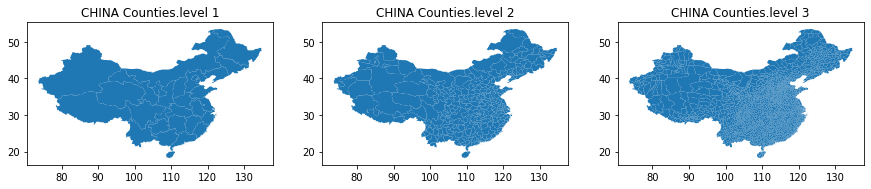

In [47]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
obj_shp_list=[obj_shp_1, obj_shp_2, obj_shp_3]
for i in range(3):
    ax=axes[i]
    obj_shp_list[i].plot(ax=ax)
    ax.set_title("CHINA Counties.level {}".format(str(i+1)))
plt.show()
    

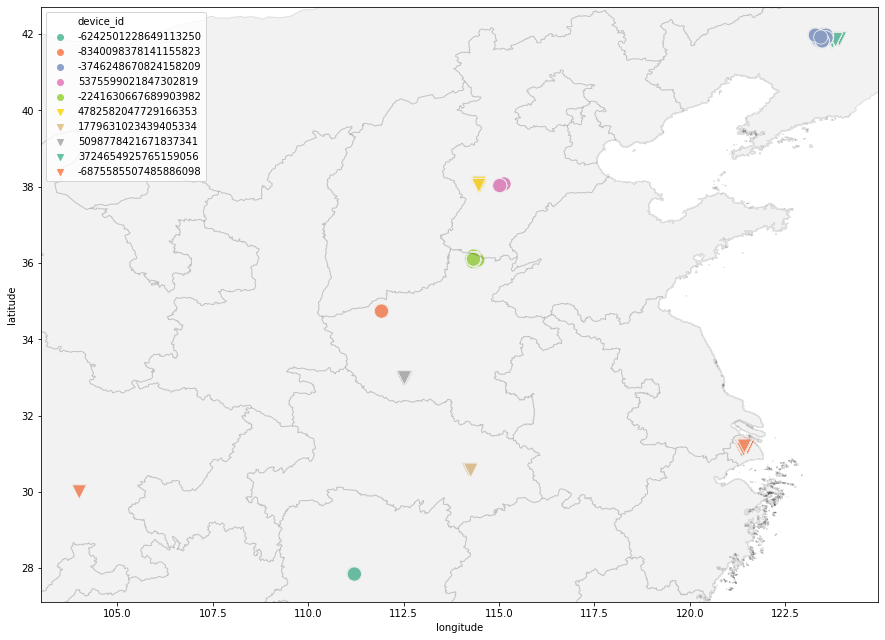

In [48]:
# top 10 active users and their locations
# df_merge_phone_events_focus_mainland = df_merge_phone_events_focus_mainland_original.copy()
# df_merge_phone_events_focus_mainland = df_merge_phone_events_focus_mainland_sampled.copy()

user_list = df_merge_phone_events_focus_mainland.device_id.value_counts().index[:10]
# user_list

df_user_single = df_merge_phone_events_focus_mainland[df_merge_phone_events_focus_mainland.device_id.\
                                                     isin(user_list)]
# df_user_single.head()

# last but not least age-cate
fig, ax = plt.subplots(figsize=(15,15))

# filled_markers = ['o', 'X', ]*5
filled_markers = ['o']*5 + ['v']*5
# sizes_list = [10000]*10
sns.scatterplot(data=df_user_single,
                x='longitude',
                y='latitude',
                hue='device_id',
                hue_order=user_list,
                palette='Set2',
#                 edgecolor ='none',   
                style='device_id',
                style_order=user_list,
                markers=filled_markers,
                s = 200,
#                 alpha=0.005,
#                 color='r',
#                 label=np.arange(1,len(user_list)+1),
                ax=ax)
# plt.legend(labels=np.arange(1,len(user_list)+1),
#            title='Smoker', loc='upper left',            
#           )
ax.set_aspect(aspect='equal')
long_tmp = ax.get_xlim()
lat_tmp = ax.get_ylim()

# obj_shp_1 = obj_shp.to_crs(epsg=4326)
obj_shp_1.plot( alpha=0.1, edgecolor='k', facecolor='gray' , ax=ax)
# ctx.add_basemap(ax)
ax.set_xlim(long_tmp[0], long_tmp[1])
ax.set_ylim(lat_tmp[0],lat_tmp[1] )

plt.show()



In [49]:
user_list

Index(['-6242501228649113250', '-8340098378141155823', '-3746248670824158209',
       '5375599021847302819', '-2241630667689903982', '4782582047729166353',
       '1779631023439405334', '5098778421671837341', '3724654925765159056',
       '-6875585507485886098'],
      dtype='object')

### comment
I am not able to precisely locate of the users, i.e. which province the users are from, rural or cities. But there is some interesting worth further exploring.
- get to know more about the top 3 active users: -6242501228649113250, -8340098378141155823, -3746248670824158209, i.e. their activity behavior
- users -3746248670824158209 and 3724654925765159056 are very close to each other, study their behavior.

# next let's find out users travel long distance
- top 10 active (based on travel distance (long.max-long.min)^2 + (lat.max-lat.min)) users and their locations
- to make it more stable, at least 10 activities

note: the distance formular is a very rough estimation, i.e. it didn't consider the zig-zag shape movement, but it can still indicate travel behavior.

In [50]:
df_merge_phone_events_focus_mainland[['longitude', 'latitude']].describe()

longitude       latitude
count  832834.000000  832834.000000
mean      114.926586      31.941182
std         5.933002       6.014792
min        75.860000      12.960000
25%       112.540000      28.010000
50%       115.260000      31.270000
75%       119.330000      36.400000
max       139.560000      52.320000

In [51]:
# distance calculate:
df_travel = (df_merge_phone_events_focus_mainland.groupby('device_id').longitude.agg(lambda x: np.square(x.max()-x.min())) +\
    df_merge_phone_events_focus_mainland.groupby('device_id').latitude.agg(lambda x: np.square(x.max()-x.min()))\
            ).sort_values(ascending=False)
df_travel

device_id
5425539535688013719     1074.5666
5642002162138626702     1052.7365
546474323269781483       992.1866
-8444032399793380935     952.4138
8750074241196451661      915.9226
                          ...    
4913874360661094572        0.0000
-688936662302830063        0.0000
315979846106579328         0.0000
3159678917593471409        0.0000
4395207728535344485        0.0000
Length: 11558, dtype: float64

In [52]:
# plot the distance
fig = px.line(y=df_travel.values,
             x=[name+' ({})'.format(i)  for i, name in (enumerate(df_travel.index, start=1))],
         )
fig.update_layout(xaxis_type='category',
#                   title_text='Bar chart with categorical axes'
                 )
fig.show()

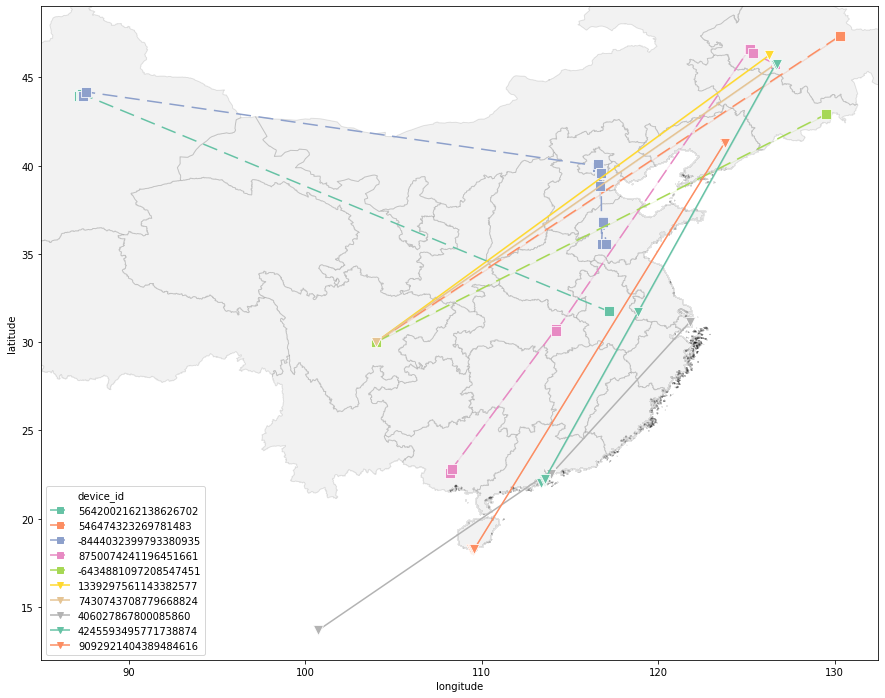

In [53]:
# top 10 active (based on travel distance long*lat) users and their locations
# to make it more stable, at least 10 activities
# TIPS:

# df_merge_phone_events_focus_mainland = df_merge_phone_events_focus_mainland_original.copy()
# df_merge_phone_events_focus_mainland = df_merge_phone_events_focus_mainland_sampled.copy()

user_list_tmp = df_merge_phone_events_focus_mainland.device_id.value_counts()\
    [df_merge_phone_events_focus_mainland.device_id.value_counts().apply(lambda x: x>10)].index
user_list = (
            df_merge_phone_events_focus_mainland[df_merge_phone_events_focus_mainland.device_id.isin(user_list_tmp)]\
                 .groupby('device_id').longitude.agg(lambda x: np.square(x.max()-x.min())) +\
            df_merge_phone_events_focus_mainland[df_merge_phone_events_focus_mainland.device_id.isin(user_list_tmp)]\
                 .groupby('device_id').latitude.agg(lambda x: np.square(x.max()-x.min()))\
            ).sort_values(ascending=False).index[:10]
# user_list

df_user_single = df_merge_phone_events_focus_mainland[df_merge_phone_events_focus_mainland.device_id.\
                                                     isin(user_list)]
# df_user_single.head()

# last but not least age-cate
fig, ax = plt.subplots(figsize=(15,15))

# filled_markers = ['o', 'v', 's', ]*4
filled_markers = ['s']*5 + ['v']*5
# linestyles = ['-']*5 + ['--']*5
linestyles = [(10, 5)]*5 + [(1, 0)]*5
sns.lineplot(data=df_user_single,
             x='longitude',
             y='latitude',
             hue='device_id',
             hue_order=user_list,
             palette='Set2',
             #                 edgecolor ='none',                    
             style='device_id',
             style_order=user_list,
             dashes=linestyles,           
             
             
             markers=filled_markers,
             markersize=10,
            
#                 x_jitter=10, y_jitter=10,
#                 alpha=0.005,
#                 color='r',
#                 label=np.arange(1,len(user_list)+1),
                ax=ax)
# plt.legend(labels=np.arange(1,len(user_list)+1),
#            title='Smoker', loc='upper left',            
#           )
ax.set_aspect(aspect='equal')
long_tmp = ax.get_xlim()
lat_tmp = ax.get_ylim()

# obj_shp = obj_shp.to_crs(epsg=4326)
obj_shp_1.plot( alpha=0.1, edgecolor='k', facecolor='gray' , ax=ax)
# ctx.add_basemap(ax)
ax.set_xlim(long_tmp[0], long_tmp[1])
ax.set_ylim(lat_tmp[0],lat_tmp[1] )

plt.show()



# Some comment
this plot is very interesting, we can track the user itinary based on that. Also we can postulate whether the users were taking flight or train. This shed a ligth to why there exist so many (0,0) coordinates. Probabely because the users were loosing signals when they were flying.

As mentioned before, GPS data are normally not easy to use, but this distance feature instead is easy to included in the ML models. But first let's analyze this feature across the target columns (i.e. gender, brands, age-cate)

In [54]:
df_travel = (df_merge_phone_events_focus_mainland.groupby('device_id').longitude.agg(lambda x: np.square(x.max()-x.min())) +\
    df_merge_phone_events_focus_mainland.groupby('device_id').latitude.agg(lambda x: np.square(x.max()-x.min()))\
            ).sort_values(ascending=False).reset_index()
df_travel.device_id = df_travel.device_id.astype('int64')
df_travel.rename(columns={0: "pseudo_distance"}, inplace=True)
df_travel

device_id  pseudo_distance
0      5425539535688013719        1074.5666
1      5642002162138626702        1052.7365
2       546474323269781483         992.1866
3     -8444032399793380935         952.4138
4      8750074241196451661         915.9226
...                    ...              ...
11553  4913874360661094572           0.0000
11554  -688936662302830063           0.0000
11555   315979846106579328           0.0000
11556  3159678917593471409           0.0000
11557  4395207728535344485           0.0000

[11558 rows x 2 columns]

In [55]:
df_merge_device_event_adddistance = pd.merge(left=df_merge_phone_focus_cuttail_newgrp,
                                         right=df_travel,
                                         how='inner',
                                         on='device_id')
df_merge_device_event_adddistance.head()

device_id brand_parse model_parse gender  age   group  \
0 -3178958522047733033        vivo       X5Pro      M   30  M29-31   
1  -661674373703931011        vivo       X5Pro      M   30  M29-31   
2 -4159560526723406355        vivo       X5Pro      M   29  M29-31   
3 -8898050314299440536        vivo       X5Pro      M   30  M29-31   
4 -6820699675296211710        vivo       X5Pro      M   29  M29-31   

  brand_model brand_cuttail brand_cuttail_10 brand_cuttail_5 age_cate  \
0  vivo-X5Pro          vivo             vivo           other   A29-31   
1  vivo-X5Pro          vivo             vivo           other   A29-31   
2  vivo-X5Pro          vivo             vivo           other   A29-31   
3  vivo-X5Pro          vivo             vivo           other   A29-31   
4  vivo-X5Pro          vivo             vivo           other   A29-31   

   pseudo_distance  
0           0.1796  
1           0.1129  
2           0.0000  
3           0.0000  
4           0.0052

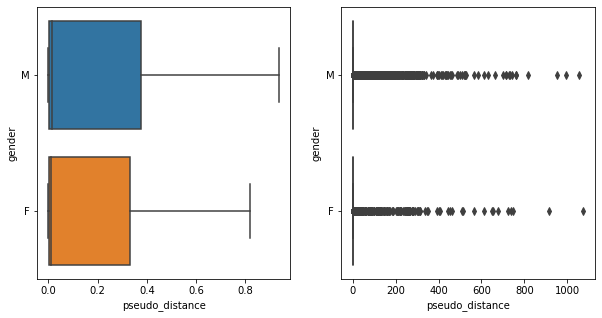

In [56]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='gender',
            showfliers=False,
        
             ax=ax[0]
             )

sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='gender',
            showfliers=True,
        
             ax=ax[1]
             )

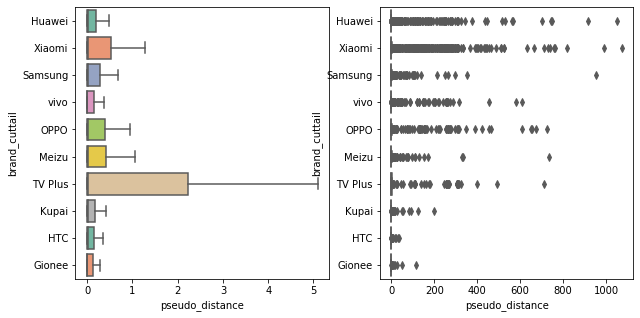

In [57]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='brand_cuttail',
            showfliers=False,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='brand_cuttail',
            showfliers=True,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[1]
             )

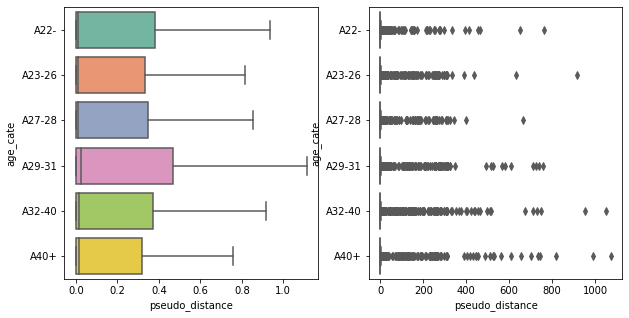

In [58]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='age_cate',
            showfliers=False,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='age_cate',
            showfliers=True,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[1]
             )

In [59]:
# #!/usr/bin/env python
# import psutil
# # gives a single float value
# psutil.cpu_percent()
# # gives an object with many fields
# psutil.virtual_memory()
# # you can convert that object to a dictionary 
# dict(psutil.virtual_memory()._asdict())

{'total': 34162823168,
 'available': 22865547264,
 'percent': 33.1,
 'used': 11297275904,
 'free': 22865547264}

### It looks like the distribution is too distorted. One last thing before we move on. power transform the psudo-distance.

In [63]:
from sklearn.preprocessing import PowerTransformer

In [64]:
pwtransformer = PowerTransformer()

In [71]:
df_merge_device_event_adddistance['psd_dist_trans'] = pwtransformer.fit_transform(df_merge_device_event_adddistance.pseudo_distance.values.reshape(-1, 1))

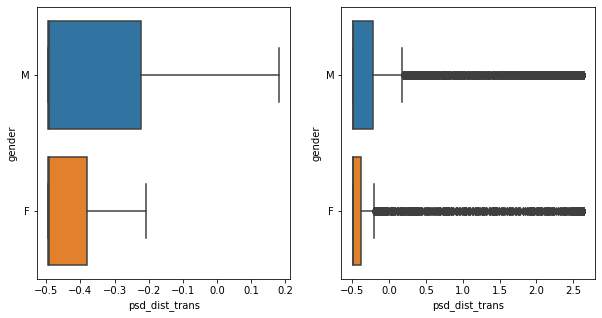

In [72]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='gender',
            showfliers=False,
        
             ax=ax[0]
             )

sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='gender',
            showfliers=True,
        
             ax=ax[1]
             )

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='brand_cuttail',
            showfliers=False,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='brand_cuttail',
            showfliers=True,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[1]
             )

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='age_cate',
            showfliers=False,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='age_cate',
            showfliers=True,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[1]
             )